In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from dython import nominal
import seaborn as sns

In [2]:
train_data = pd.read_csv("dataset/train.csv")
test_data = pd.read_csv("dataset/test.csv")
train_data.head()

,ad_batchId,ad_taskId,ad_content_title,ad_content_body,ad_content_price_amount,ad_content_price_currency,ad_content_category_name,ad_content_createdAt,ad_content_updatedAt,ad_content_customerSpecific_version,...,ad_content_customerSpecific_wheelDiscType,ad_content_customerSpecific_wheelSize,ad_content_customerSpecific_wheelPcd,ad_content_customerSpecific_autoMotoModel,ad_content_customerSpecific_autoMotoBody,ad_content_customerSpecific_autoCondition,ad_content_customerSpecific_wheelTireType,ad_content_customerSpecific_wheelWidth,ad_content_customerSpecific_wheelHeight,ad_customerSpecific_moderationDecision
0,fbad6cd7-28fd-4f4b-aaa6-a6b868948346,5b43fa5d-1366-458f-adca-d93c798d5218,Mercedes-Benz 190,"Продается мерс, вложение по кузову, все вопрос...",520000.0,KZT,Used cars,2018-02-12T10:18:07.000Z,2018-02-12 10:19:47+00:00,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,approved
1,1d0a94b7-3ffd-424b-80e9-56628dae3dfe,704f1602-3806-41c2-bf31-f5e87dcdac7a,Решетка в бампер BMW E60 03-07 RH,Решетка в бампер BMW E60 03-07 RH. \nДубликат....,6000.0,KZT,Sale of spare parts,2018-02-11T12:19:18.000Z,2018-02-12 10:19:49+00:00,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,approved
2,12c1bf84-4d5f-48e1-b9bf-6b55d076846e,21629a4b-645e-46e2-b6c6-aa88a6d52311,Помпа на Subaru Outback 2013-2015,Помпа на Субару Аутбак 2013-2015 двигатель FB2...,222.0,KZT,Sale of spare parts,2018-02-12T12:50:49.000Z,2018-02-12 12:54:35+00:00,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,approved
3,ff716a24-a089-4097-85b0-79c892a0bcd2,978c3ad4-150c-4eac-a91e-e61cbdb386a4,Audi 100,С продажей не тороплюсь,1000000.0,KZT,Used cars,2018-02-12T12:51:41.000Z,2018-02-12 12:54:35+00:00,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,approved
4,9a3c9c1c-6966-4e2f-a2b8-9aaba4fc6223,a0b796f9-0e01-4ea2-a7c7-75d1754f5c8f,ВАЗ (Lada) 2108 (хэтчбек),"Продаю ваз 2108, 91 года. машина на ходу\nНахо...",270000.0,KZT,Used cars,2018-02-12T12:44:40.000Z,2018-02-12 12:54:38+00:00,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,approved


# I/-Exploring dataset

We first start exploring the dataset and its colmuns. 

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ad_batchId                                  400000 non-null  object 
 1   ad_taskId                                   400000 non-null  object 
 2   ad_content_title                            400000 non-null  object 
 3   ad_content_body                             370131 non-null  object 
 4   ad_content_price_amount                     399851 non-null  float64
 5   ad_content_price_currency                   399851 non-null  object 
 6   ad_content_category_name                    400000 non-null  object 
 7   ad_content_createdAt                        400000 non-null  object 
 8   ad_content_updatedAt                        400000 non-null  object 
 9   ad_content_customerSpecific_version         400000 non-null  int64  
 

We see that a lot of columns suffers from missing data, however an important remark is that a lot of columns are category specific. We start by exploring columns with less missing data. 

### TARGET COLUMN 

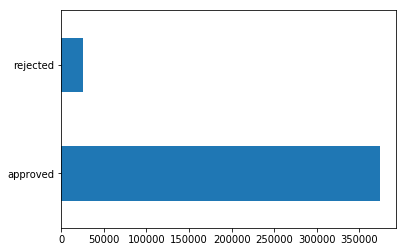

In [5]:
target_column = "ad_customerSpecific_moderationDecision"
train_data[target_column].value_counts().plot(kind='barh')

In [6]:
train_data[target_column].value_counts(normalize=True)*100

approved    93.6075
rejected     6.3925
Name: ad_customerSpecific_moderationDecision, dtype: float64

The train dataset is highly imbalanced. We have 94% of the samples in the positive class, and only 6% on the negative class.

### LOCATION COLUMNS 

In [8]:
location_columns = [col for col in train_data.columns if "location" in col]
location_columns

['ad_location_ipAddress',
 'ad_location_city',
 'ad_location_region',
 'ad_location_customerSpecific_regionList_id']

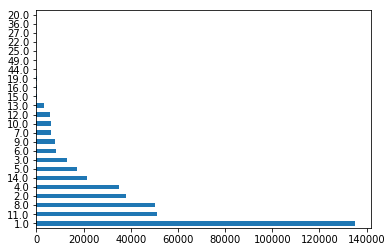

In [9]:
train_data["ad_location_customerSpecific_regionList_id"].value_counts()[:20].plot(kind="barh")

`ad_location_customerSpecific_regionList_id` is a categorical data. 

In [10]:
# Transform `ad_location_customerSpecific_regionList_id` to categorical data.
train_data["ad_location_customerSpecific_regionList_id"] = train_data["ad_location_customerSpecific_regionList_id"].astype('object')

We compute the correlation between the variables : `ad_location_customerSpecific_regionList_id`, `ad_location_city`, `ad_location_region`, `ad_location_ipAddress`

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


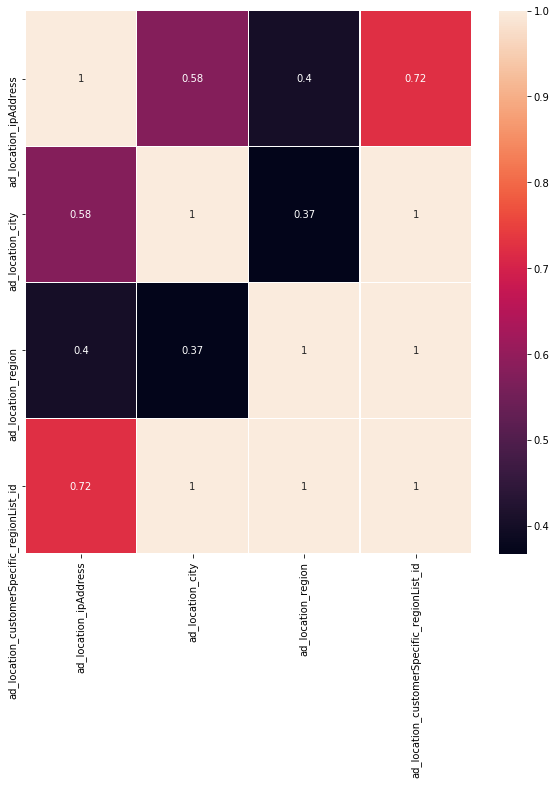

In [12]:
corr_matrix = nominal.associations(train_data[location_columns], nominal_columns=location_columns, plot=False, return_results=True , theils_u=True)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)

As `ad_location_customerSpecific_regionList_id`, `ad_location_city`, `ad_location_region`, `ad_location_ipAddress` are highly correlated. We keep just one of them : `ad_location_customerSpecific_regionList_id`

In [13]:
train_data.drop(columns=['ad_location_city','ad_location_region','ad_location_ipAddress'], inplace=True)
#test_data.drop(columns=['ad_location_city','ad_location_region','ad_location_ipAddress'], inplace=True)

### PRICE CURRENCY COLUMNS

In [14]:
train_data["ad_content_price_currency"].value_counts()

KZT    399841
USD         8
RUB         2
Name: ad_content_price_currency, dtype: int64

In [15]:
test_data["ad_content_price_currency"].value_counts()

KZT    100190
USD         8
Name: ad_content_price_currency, dtype: int64

The majority of the currencies are in KZT. And only 10 prices are in different currencies. So it would be better of we convert all currencies to `KZT`

In [16]:
currency_exchange_dict = {"RUB_KZT" : 5.82, 
                         "USD_KZT": 399.63}

# USD to KZT 
train_data["ad_content_price_amount"] = train_data["ad_content_price_amount"]*currency_exchange_dict['USD_KZT']
train_data["ad_content_price_currency"] = "KZT"

# RUB to KZT 
train_data["ad_content_price_amount"] = train_data["ad_content_price_amount"]*currency_exchange_dict['RUB_KZT']
train_data["ad_content_price_currency"] = "KZT"

train_data.drop(columns="ad_content_price_currency", inplace=True)

### TIME COLUMNS 

We have 3 time columns.
I created 2 features using those 3 columns. Those features represent the time in days between creation and update times, and time in days between registration and creation times.

In [17]:
time_columns = ['ad_content_createdAt','ad_content_updatedAt','ad_user_customerSpecific_registeredAt']

for col in time_columns:
    train_data[col] = pd.to_datetime(train_data[col], utc=True)

train_data['time_between_creation_update'] = (train_data['ad_content_updatedAt'] - train_data['ad_content_createdAt']).dt.days
train_data['time_between_registration_creation'] = (train_data['ad_content_createdAt'] - train_data['ad_user_customerSpecific_registeredAt'] ).dt.days
train_data.drop(columns=time_columns, inplace=True)

### SPLIT DATA INTO CATEGORIES 

As a lot of columns are category specific, we should then split our dataset by categories. 

In [18]:
categories = set(train_data.ad_content_category_name)

categories

{'Sale of spare parts',
 'Tires',
 'Two-wheeled motor vehicles',
 'Used cars',
 'Wheel disks'}

5 Categories are present in our dataset, we will explore the features of each category.

In [19]:
train_data_by_category = {}
test_data_by_category = {}

for category in set(train_data.ad_content_category_name):
    train_data_by_category[category] =\
     train_data[train_data.ad_content_category_name
                == category].drop("ad_content_category_name", axis=1)

    test_data_by_category[category] =\
     test_data[test_data.ad_content_category_name
                == category].drop("ad_content_category_name", axis=1)
            

By spltting the data set by categoy we see that we got rid of missing points, we almost have no missing data now. We still need a preporcessing step to get rid of columns with no data in each category:

In [20]:
for category in categories:
    train_data_by_category[category] =\
     train_data_by_category[category].dropna(axis=1, how="all")

    test_data_by_category[category] =\
     test_data_by_category[category].dropna(axis=1, how="all")



In [22]:
for category in categories:
    print("Category: {}".format(category))
    print("Train")
    print(train_data_by_category[category].info())
    print("Test")
    print(test_data_by_category[category].info())
    print("#"*50)

Category: Sale of spare parts
Train
<class 'pandas.core.frame.DataFrame'>
Int64Index: 223615 entries, 1 to 399999
Data columns (total 14 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ad_batchId                                  223615 non-null  object 
 1   ad_taskId                                   223615 non-null  object 
 2   ad_content_title                            223615 non-null  object 
 3   ad_content_body                             222393 non-null  object 
 4   ad_content_price_amount                     223575 non-null  float64
 5   ad_content_customerSpecific_version         223615 non-null  int64  
 6   ad_content_customerSpecific_device          223615 non-null  object 
 7   ad_content_customerSpecific_autoCarMm       223587 non-null  object 
 8   ad_content_customerSpecific_autoCarOrder    222757 non-null  float64
 9   ad_location_customerSpecific_regio

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44016 entries, 0 to 100230
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ad_batchId                                  44016 non-null  object 
 1   ad_taskId                                   44016 non-null  object 
 2   ad_content_title                            44016 non-null  object 
 3   ad_content_body                             36115 non-null  object 
 4   ad_content_price_amount                     44015 non-null  float64
 5   ad_content_price_currency                   44015 non-null  object 
 6   ad_content_createdAt                        44016 non-null  object 
 7   ad_content_updatedAt                        44016 non-null  object 
 8   ad_content_customerSpecific_version         44016 non-null  int64  
 9   ad_content_customerSpecific_device          44016 non-null  object 
 10  ad_conten

**Conlusion**: The dataset is in fact the concatenation of four datasets, each of them for a specific catgeory.